# Codebook  
**Authors:** Patrick Guo  
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.

In [125]:
import boto3
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import statistics
import re
from langdetect import detect

In [2]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('my-bucket')

# 42621 Final_Data_ngodarpan.gov.in

## TOC:
* [About this dataset](#1)
* [What's in this dataset](#2)
* [Codebook](#3)
    * [Missing values](#3.1)
    * [Summary statistics](#3.2)
* [Columns](#4)
    * [Name](4.1)
    * [ngo url](4.2)
    * [Mobile](4.3)
    * [UniqueID](4.4)
    * [Off phone1](4.5)
    * [Email](4.6)
    * [Major Activities1](4.7)
    * [operational states db](4.8)
    * [issues working db](4.9)
    * [operational district db](4.10)
    * [reg name](4.11)
    * [fcrano](4.12)
    * [nr regNo](4.13)
    * [nr add](4.14)
    * [nr orgName](4.15)
    * [ngo reg date](4.16)
    * [nr actName](4.17)
    * [nr city](4.18)
    * [TypeDescription](4.19)
    * [StateName](4.20)
    * [status](4.21)
    * [president name](4.22)
    * [president email](4.23)
    * [president mobile](4.24)
    * [Chairman name](4.25)
    * [Chairman email](4.26)
    * [Chairman mobile](4.27)
    * [Secretary name](4.28)
    * [Secretary email](4.29)
    * [Secretary mobile](4.30)
    * [Asisstant Secretary name](4.31)
    * [Asisstant Secretary email](4.32)
    * [Asisstant Secretary mobile](4.33)
    * [Board Member name](4.34)
    * [Board Member email](4.35)
    * [Board Member mobile](4.36)
    * [Vice Chairman name](4.37)
    * [Vice Chairman email](4.38)
    * [Vice Chairman mobile](4.39)
    * [Member name](4.40)
    * [Member email](4.41)
    * [Member mobile](4.42)

In [3]:
# Lists out the column names in TOC format
def toc_maker(dataset):
    counter = 1
    for column in dataset.columns:
        print("* ["+column+"](4."+str(counter)+")")
        counter +=1

In [4]:
#toc_maker(Final_Data_ngodarpan)

**About this dataset**  <a class="anchor" id="1"></a>  
Data provided by: NGO Darpan  
Source: ngodarpan.gov.in   
Type: xlsx  
Last Modified: June 1, 2021, 17:06:30 (UTC-07:00)  
Size: 49.7 MB

In [5]:
path = "s3://daanmatchdatafiles/Darpan21FCRA/42621 Final_Data_ngodarpan.gov.in.xlsx"
xl = pd.ExcelFile(path)
print(xl.sheet_names)
Final_Data_ngodarpan = xl.parse('ngodarpan.gov.in')
Final_Data_ngodarpan.head()

['ngodarpan.gov.in']


,Name,ngo url,Mobile,UniqueID,Off phone1,Email,Major Activities1,operational states db,issues working db,operational district db,...,Asisstant Secretary mobile,Board Member name,Board Member email,Board Member mobile,Vice Chairman name,Vice Chairman email,Vice Chairman mobile,Member name,Member email,Member mobile
0,PRAYAS,NaN,9.778080e+09,OR/2009/0010000,06858-223440,director_prayas@yahoo.com,1.63 Nos. of SHGs formed,"ORISSA,","Agriculture,Children,Civic Issues,Disaster Man...","ORISSA->Nabarangapur ,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PONDICHERRYWOMENSCONFERENCE,NaN,9.443253e+09,PY/2016/0100001,0413-2213238,surebe33@gmail.com,Working for Women and Children Obtaining Loan ...,"PUDUCHERRY,","Women's Development & Empowerment,Children,","PUDUCHERRY->Puducherry,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SHABRI SAMAJ SEWA SAMITI,http://ssssamitibhind.org,7.828394e+09,MP/2016/0100003,0751-1234689,ssssamitibhind@gmail.com,more than one thousand leadership development ...,"MADHYA PRADESH,","Animal Husbandry, Dairying & Fisheries,Agricul...","MADHYA PRADESH->Anuppur, Ashoknagar, Balaghat,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALOK,ssssamitibhind@gmail.com,7.828498e+09
3,ANAND GANGA SAMAJIK SIKSHA SAMITI,NaN,9.450678e+09,UP/2016/0100004,05566-281059,lovelyraivijendra@gmail.com,OUR ORGANISATION HAVE PLANTED MORE THAN 2 LAKH...,"UTTAR PRADESH,","Agriculture,Environment & Forests,Health & Fam...","UTTAR PRADESH->Deoria, Gorakhpur, Sant Kabir N...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Himaliyan Gram Vikas Samiti,NaN,9.412037e+09,UA/2016/0100009,05964-213271,hgvs1990@gmail.com,Facilitated formation and strengthening of 65C...,"UTTARAKHAND,","Animal Husbandry, Dairying & Fisheries,Agricul...","UTTARAKHAND->Almora , Bageshwar, Champawat, Pi...",...,NaN,Krishna Nand,hgvsgan@yahoo.co.in,7.500720e+09,Leela Dhar Joshi,hgvs.jleeladhar.lj@gmail.com,8.057816e+09,NaN,NaN,NaN


**What's in this dataset?**  <a class="anchor" id="2"></a>  

In [6]:
dataset = Final_Data_ngodarpan
print("Shape:", dataset.shape)
print("Rows:", dataset.shape[0])
print("Columns:", dataset.shape[1])
print("Each row is a NGO.")

Shape: (111929, 42)
Rows: 111929
Columns: 42
Each row is a NGO.


**Codebook** <a class="anchor" id="3"></a>

In [145]:
dataset_columns = [column for column in dataset.columns]
dataset_desc = ["Name of NGO",
               "URL for NGO",
               "Mobile phone",
               "Unique ID of VO/NGO",
               "Telephone/Alternate number",
               "Email address",
               "Description of major activities",
               "List of states or union territories they operate in.",
               "List of issues they are working on",
               "List of districts they operate in",
               "Name of registrar",
               "FCRA number",
               "Registration number",
               "Address",
               "Name of NGO",
               "Registration date",
               "Name of Act",
               "City of NGO",
               ]
dataset_desc = dataset_desc + ["N/A"] * (len(dataset_columns) - len(dataset_desc))
dataset_dtypes = [dtype for dtype in dataset.dtypes]

data = {"Column Name": dataset_columns, "Description": dataset_desc, "Type": dataset_dtypes}
codebook = pd.DataFrame(data)
codebook

,Column Name,Description,Type
0,Name,Name of NGO,object
1,ngo url,URL for NGO,object
2,Mobile,Mobile phone,float64
3,UniqueID,Unique ID of VO/NGO,object
4,Off phone1,Telephone/Alternate number,object
5,Email,Email address,object
6,Major Activities1,Description of major activities,object
7,operational states db,List of states or union territories they opera...,object
8,issues working db,List of issues they are working on,object
9,operational district db,List of districts they operate in,object


**Missing values** <a class="anchor" id="3.1"></a>

In [8]:
Final_Data_ngodarpan.isnull().sum()

Name                               0
ngo url                        86142
Mobile                            32
UniqueID                           0
Off phone1                     95402
Email                              0
Major Activities1              27311
operational states db          23039
issues working db              22637
operational district db        23039
reg name                           0
fcrano                         89869
nr regNo                           3
nr add                             0
nr orgName                         0
ngo reg date                       0
nr actName                      1316
nr city                          214
TypeDescription                    0
StateName                          0
status                        111929
president name                 52520
president email                52520
president mobile               52520
Chairman name                  82126
Chairman email                 82132
Chairman mobile                82137
S

**Summary statistics** <a class="anchor" id="3.2"></a>

None. All qualitative features.

## Columns
<a class="anchor" id="4"></a>

### Name
<a class="anchor" id="4.1"></a>
Name of NGO.  
No. of unique values: 109682  
No. of duplicates: 1548  

In [9]:
column = dataset["Name"]
column

0                                                    PRAYAS
1                               PONDICHERRYWOMENSCONFERENCE
2                                  SHABRI SAMAJ SEWA SAMITI
3                         ANAND GANGA SAMAJIK SIKSHA SAMITI
4                               Himaliyan Gram Vikas Samiti
                                ...                        
111924                            Hariom Samaj Vikas Samiti
111925    narmadanchal naya jeevan jan kalyaan seva sami...
111926                    Mathura Prasad Gramodyog Sansthan
111927                   Shree Swaminarayan Education Trust
111928                                      Srijan Sansthan
Name: Name, Length: 111929, dtype: object

In [10]:
# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))
print("No. of unique values:", len(column.unique()))
# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of duplicates:", len(duplicates))
table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Names", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 0
No. of unique values: 109682
No. of duplicates: 1548


,Duplicate Names,Count
0,CATHOLIC CHURCH,25
1,RURAL DEVELOPMENT SOCIETY,20
2,INDIAN RED CROSS SOCIETY,11
3,Rural Development Society,11
4,RAMAKRISHNA MISSION,10
...,...,...
1543,Association for Integrated Rural Development,2
1544,ADARSH EDUCATIONAL SOCIETY,2
1545,Little Sisters of the Poor,2
1546,SHALOM FOUNDATION,2


In [11]:
# Example
dataset[column == table.iloc[0,0]].head()

,Name,ngo url,Mobile,UniqueID,Off phone1,Email,Major Activities1,operational states db,issues working db,operational district db,...,Asisstant Secretary mobile,Board Member name,Board Member email,Board Member mobile,Vice Chairman name,Vice Chairman email,Vice Chairman mobile,Member name,Member email,Member mobile
23563,CATHOLIC CHURCH,NaN,9.427830e+09,GJ/2017/0168939,NaN,CATHOLICCHURCHVYARA@GMAIL.COM,PRIEST MANTENANCE,"GUJARAT,","Children,Education & Literacy,Health & Family ...","GUJARAT->Tapi,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26416,CATHOLIC CHURCH,NaN,9.998133e+09,GJ/2017/0172648,NaN,ccvadtal@gmail.com,RELIGIOUS AND SOCIAL,"GUJARAT,","Education & Literacy,Any Other,","GUJARAT->Anand ,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SELVIN CRUZ,ccvadtal@gmail.com,9.763823e+09
26884,CATHOLIC CHURCH,NaN,9.426880e+09,GJ/2017/0173225,NaN,catholicchurchzaroli@gmail.com,THE OBJECT OF THE TRUST ARE RELIGIOUS EDUCATIO...,"GUJARAT,","Education & Literacy,Any Other,","GUJARAT->Valsad,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VASAVA KANTILAL HIMATSING,kantivasava1959@gmail.com,9.904656e+09
27081,CATHOLIC CHURCH,NaN,9.426513e+09,GJ/2017/0173470,NaN,frsjraj@gmail.com,THE OBJECT OF THE TRUST ARE RELIGIOUS AND CHAR...,"GUJARAT,","Education & Literacy,Any Other,","GUJARAT->Anand ,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARASAKUMAR DEVASAGAYAM RAYAPPAN,arayappan@gmail.com,9.426513e+09
27999,CATHOLIC CHURCH,NaN,9.426389e+09,GJ/2017/0174578,NaN,frarulhmt@gmail.com,Trust has mainly involved in village animation...,"GUJARAT,","Education & Literacy,","GUJARAT->Arvalli,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kamjibhai Nemaji Dund,KAMJIDUND@GMAIL.COM,9.979210e+09


Same ```name``` does not mean duplicate rows.

### ngo url
<a class="anchor" id="4.2"></a>
URL for NGO.  
No. of unique values: 24253  
No. of duplicates values: 202   
A lot of NGOs were confused in the information filling process, and pasted the NGO darpan URL instead of the URL to their NGO's website if there is one: the first 13. So there are a large number of invalid URLs.  
Additionally, a large number of urls cannot be reached.

In [12]:
column = dataset["ngo url"]
column

0                                  NaN
1                                  NaN
2            http://ssssamitibhind.org
3                                  NaN
4                                  NaN
                      ...             
111924                         http://
111925                             NaN
111926         http://mathuravikas1977
111927                             NaN
111928    http:/www.srijansansthan.com
Name: ngo url, Length: 111929, dtype: object

In [13]:
# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate URLs", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 86142
No. of unique values: 24253
No. of Duplicates: 202


,Duplicate URLs,Count
0,NaN,86142
1,http://,859
2,https://ngodarpan.gov.in/index.php/ngo/primaryngo,159
3,https://ngodarpan.gov.in,57
4,http://ngodarpan.gov.in/index.php/ngo/primaryngo,56
...,...,...
197,http://www.saraswatigoi.com,2
198,http://www.msmhc.org,2
199,http://www.poddarinstitute.org,2
200,http://www.svnycindia.org/,2


A lot of NGOs were confused in the information filling process, and pasted the NGO darpan URL instead of the URL to their NGO's website if there is one: the first 13. So there are a large number of invalid URLs. Additionally, a large number of urls cannot be reached.

In [14]:
table.iloc[13:]

,Duplicate URLs,Count
13,http://www.jss.nic.in,8
14,http://www.srigurudev.org,8
15,http://www.durbar.org,7
16,http://jss.nic.in,7
17,http://www.ngo.india.gov.in,6
...,...,...
197,http://www.saraswatigoi.com,2
198,http://www.msmhc.org,2
199,http://www.poddarinstitute.org,2
200,http://www.svnycindia.org/,2


In [15]:
# Example
dataset[column == table.iloc[13,0]].head()

,Name,ngo url,Mobile,UniqueID,Off phone1,Email,Major Activities1,operational states db,issues working db,operational district db,...,Asisstant Secretary mobile,Board Member name,Board Member email,Board Member mobile,Vice Chairman name,Vice Chairman email,Vice Chairman mobile,Member name,Member email,Member mobile
1532,STATE RESOURCE CENTER DISPUR ASSAM,http://www.jss.nic.in,9.435328e+09,AS/2016/0104590,0361-2388990,srcdispur@yahoo.com,The critical focus of SRC Dispur is giving tec...,"ASSAM,","Education & Literacy,Human Rights,Vocational T...","ASSAM->Barpeta, Dhubri, Hailakandi, Tinsukia,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,jan shikshan sansthan raigad,http://www.jss.nic.in,9.922999e+10,MH/2016/0104734,02141-227932,jssrgd@gmail.com,"14. Jan Shikshan Sansthan Raigad ,Maharashtra ...","MAHARASHTRA,","Vocational Training,","MAHARASHTRA->Raigarh,",...,NaN,Advt,jssrgd@gmail.com,9.372212e+09,Mrs,jssrgd@gmail.com,9.766168e+09,NaN,NaN,NaN
1611,JAN SHIKSHAN SANSHTHAN CHANDAULI,http://www.jss.nic.in,8.924071e+09,UP/2016/0104747,05412-260625,jsschandauli1@gmail.com,JAN SHIKSHAN SANSHTHAN IS ORGNISING VOCATIONAL...,"UTTAR PRADESH,","Vocational Training,","UTTAR PRADESH->Chandauli, Chandauli,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1660,JAN SHIKSHAN SANSTHAN GUNA,http://www.jss.nic.in,9.425633e+09,MP/2016/0104852,07542-252375,jssguna@gmail.com,Jan Shikshan Sansthan is working of Vocational...,"MADHYA PRADESH,","Civic Issues,Drinking Water,Education & Litera...","MADHYA PRADESH->Guna,",...,NaN,NaN,NaN,NaN,Vishnu Sharma,yuvacollege@ymail.com,9.893453e+09,Manisha Pandey,parthpandey@gmail.com,9.926540e+09
1702,JAN SHIKSHAN SANSTHAN BASTI,http://www.jss.nic.in,9.415174e+09,UP/2016/0104945,05542-209210,jssbasti44@yahoo.in,We are conducting the activities by govt of In...,"UTTAR PRADESH,","Education & Literacy,","UTTAR PRADESH->Basti,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Duplicates for ```ngo url``` do not mean duplicate rows.

### Mobile
<a class="anchor" id="4.3"></a>
Mobile number. 
Incorrect dtype.  
Varying lenght for mobile: 9, 10, 11
No. of null values: 32  
No. of unique values: 111431  
No. of duplicates values: 402.   

In [16]:
column = dataset["Mobile"]
column

0         9.778080e+09
1         9.443253e+09
2         7.828394e+09
3         9.450678e+09
4         9.412037e+09
              ...     
111924    9.335113e+09
111925    9.425042e+09
111926    9.452122e+09
111927    9.727767e+09
111928    9.667617e+09
Name: Mobile, Length: 111929, dtype: float64

In [17]:
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Drop nulls and remove float and convert to str.
column = column.dropna().astype(int).astype(str)

# Lenght of mobile number
print("Lengths:", column.apply(len).unique())

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Mobile numbers", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Nulls: 32
No. of unique values: 111431
Lengths: [10 11  9]
No. of Duplicates: 402


,Duplicate Mobile numbers,Count
0,9422471767,8
1,9427841472,5
2,9810625871,5
3,9422176417,5
4,9449806802,5
...,...,...
397,9923175024,2
398,9450196884,2
399,9418515174,2
400,9897409820,2


In [18]:
# Example
dataset[dataset["Mobile"] == int(table.iloc[0,0])].head()

,Name,ngo url,Mobile,UniqueID,Off phone1,Email,Major Activities1,operational states db,issues working db,operational district db,...,Asisstant Secretary mobile,Board Member name,Board Member email,Board Member mobile,Vice Chairman name,Vice Chairman email,Vice Chairman mobile,Member name,Member email,Member mobile
2169,Basayya Bahuddeshiya Sevabhavi Sanstha,http://bavayyasansthango.com,9.422472e+09,MH/2016/0105915,02382-220770,bavayyasanstha@gmail.com,The Organization has been implementing various...,"MAHARASHTRA,","Aged/Elderly,Agriculture,Art & Culture,Biotech...","MAHARASHTRA->Bid, Jalna, Kolhapur, Latur, Nand...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3161,NARSINH JAN KALYAN SEVABHAVI SANSTHA,NaN,9.422472e+09,MH/2016/0108280,02382-220770,narsinhseva@gmail.com,The Organization has been implementing various...,"MAHARASHTRA,","Animal Husbandry, Dairying & Fisheries,Aged/El...","MAHARASHTRA->Akola, Bid, Hingoli, Jalna, Latur...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3317,Rashtriya Yuva Seva Sanstha Udgir,http://,9.422472e+09,MH/2016/0108671,02382-220770,rashtriyaudgir@gmail.com,The organization has been implementing various...,"MAHARASHTRA,","Any Other,","MAHARASHTRA->Latur,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5112,KUMUDINI SHAIKSHANIK AND SAMAJIK SANSTHA,http://,9.422472e+09,MH/2016/0113308,02382-220770,kumudinipune@gmail.com,THE ORGANIZATION HAS BEEN IMPLEMENTING VARIOUS...,"MAHARASHTRA,","Aged/Elderly,Agriculture,Art & Culture,Childre...","MAHARASHTRA->Hingoli, Parbhani, Pune,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHHAYA,kumudinipune@gmail.com,9.713178e+09
6682,RASHTRAJAGRUTI BAHUUDDESHIYA SANSTHA,http://,9.422472e+09,MH/2017/0116935,02382-220770,rashtrajagrutitrust@gmail.com,THE ORGANIZATION HAS BEEN IMPLEMENTING VARIOUS...,"MAHARASHTRA,","Aged/Elderly,Art & Culture,Children,Dalit Upli...","MAHARASHTRA->Latur,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Duplicate ```Mobile``` does not mean duplicate rows.

### UniqueID
<a class="anchor" id="4.4"></a>
Unique ID of VO/NGO.  
No. of unique values: 111929 

In [19]:
column = dataset["UniqueID"]
column

0         OR/2009/0010000
1         PY/2016/0100001
2         MP/2016/0100003
3         UP/2016/0100004
4         UA/2016/0100009
               ...       
111924    UP/2016/0099987
111925    MP/2016/0099988
111926    UP/2016/0099992
111927    GJ/2016/0099995
111928    RJ/2016/0099998
Name: UniqueID, Length: 111929, dtype: object

In [20]:
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

Nulls: 0
No. of unique values: 111929
No. of Duplicates: 0


### Off phone1
<a class="anchor" id="4.5"></a>
Telephone/Alternate number.  
Contains invalid numbers: All zeros.  
Invalid formats: mysql_prep(#Mobile)   
Numbers of varying length.
Nulls: 95402  
No. of unique values: 15364  
No. of duplicates: 641. 

In [21]:
column = dataset["Off phone1"]
column

0         06858-223440
1         0413-2213238
2         0751-1234689
3         05566-281059
4         05964-213271
              ...     
111924     0532-225545
111925     78696-71925
111926     0532-215242
111927    02633-260100
111928    05644-221840
Name: Off phone1, Length: 111929, dtype: object

In [22]:
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Drop nulls and remove hyphen and mysql_prep()
column = column.dropna()
cleaned_column = [re.sub('[^0-9]','', row) for row in column]
column = pd.Series(cleaned_column)



# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
del duplicates["0000000000000"]
del duplicates["00000000000"]
del duplicates["0000000000"]
del duplicates["000000000"]
del duplicates["00000000"]
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Off phone1 numbers", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)

# Lenght of numbers
print("Lengths:", table["Duplicate Off phone1 numbers"].apply(len).unique())

table

Nulls: 95402
No. of unique values: 15364
No. of Duplicates: 639
Lengths: [11 10  9]


,Duplicate Off phone1 numbers,Count
0,03852321291,29
1,05223213944,16
2,05220000000,14
3,03300000000,13
4,01100000000,12
...,...,...
634,5921222384,2
635,08472251826,2
636,05420000000,2
637,9402411827,2


Column contains numbers of varying length.

In [23]:
# Example
dataset[dataset["Off phone1"].str.replace("-", "") == table.iloc[3,0]].head()

,Name,ngo url,Mobile,UniqueID,Off phone1,Email,Major Activities1,operational states db,issues working db,operational district db,...,Asisstant Secretary mobile,Board Member name,Board Member email,Board Member mobile,Vice Chairman name,Vice Chairman email,Vice Chairman mobile,Member name,Member email,Member mobile
247,Kalyanpur Juba Sangha,NaN,9.038675e+09,WB/2016/0100637,033-00000000,kcjana1955@gmail.com,The NGO has been working on environmental awar...,"WEST BENGAL,","Aged/Elderly,Art & Culture,Children,Education ...","WEST BENGAL->Purba Medinipur,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3930,Sahara Health and Education Society,http://www.jeevansahara.org,9.836613e+09,WB/2009/0001101,033-00000000,oursahara1993@gmail.com,We have been engaged in nurturing destitute ch...,"WEST BENGAL,","Aged/Elderly,Children,Education & Literacy,Spo...","WEST BENGAL->North Twenty Four Parganas, South...",...,9.748274e+09,NaN,NaN,NaN,NaN,NaN,NaN,Dolonchampa Dutta,oursahara1993@gmail.com,9.231589e+09
4776,HARBHANGI BALAK SANGHA,http://,9.153022e+09,WB/2016/0112464,033-00000000,hbalaksangha@gmail.com,"Education, Health Camp, Vocational Training, Y...","WEST BENGAL,","Agriculture,Children,Drinking Water,Education ...","WEST BENGAL->South Twenty Four Parganas, South...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PINTU BAIDYA,hbalaksangha@gmail.com,9.153022e+09
5059,SANDESH KHALI CHATANA SAMAJ KALYAN KENDRA,http://,9.733855e+09,WB/2016/0113161,033-00000000,sdkchetana@gmail.com,"Institutional Delivery Centre,Mother and Child...","WEST BENGAL,","Aged/Elderly,Children,Differently Abled,Educat...","WEST BENGAL->North Twenty Four Parganas, South...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8277,MADHYAMGRAM SHINE WELFARE SOCIETY,NaN,9.874777e+09,WB/2017/0120306,033-00000000,theshine.social@gmail.com,"Education, Health, Vocational Training, Skill ...","WEST BENGAL,","Children,Differently Abled,Drinking Water,Educ...","WEST BENGAL->North Twenty Four Parganas,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Duplicate ```Off phone1``` does not mean duplicate rows.

### Email
<a class="anchor" id="4.6"></a>
Email addresss.    
No. of unique values: 111557  
No. of Duplicates: 340

In [24]:
column = dataset["Email"]
column

0             director_prayas@yahoo.com
1                    surebe33@gmail.com
2              ssssamitibhind@gmail.com
3           lovelyraivijendra@gmail.com
4                    hgvs1990@gmail.com
                      ...              
111924           homsvs1989@yahoo.co.in
111925               nnjjkss1@gmail.com
111926       mathuravikas1977@gmail.com
111927           snsdharampur@gmail.com
111928    srijansansthan@rediffmail.com
Name: Email, Length: 111929, dtype: object

In [25]:
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Lower case all emails
column = column.str.lower()

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Email IDs", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Nulls: 0
No. of unique values: 111557
No. of Duplicates: 370


,Duplicate Email IDs,Count
0,rhpatel166@gmail.com,10
1,infoadvisorchamber@gmail.com,6
2,ngodiary@gmail.com,4
3,banking.vkhill@hkm-group.org,4
4,indoprideschool@gmail.com,4
...,...,...
365,divinewordsociety@gmail.com,2
366,solomanghosh@gmail.com,2
367,udavumkarangal@gmail.com,2
368,info@mldtrust.org,2


In [26]:
# Example
dataset[dataset["Email"] == table.iloc[0,0]].head()

,Name,ngo url,Mobile,UniqueID,Off phone1,Email,Major Activities1,operational states db,issues working db,operational district db,...,Asisstant Secretary mobile,Board Member name,Board Member email,Board Member mobile,Vice Chairman name,Vice Chairman email,Vice Chairman mobile,Member name,Member email,Member mobile


In [27]:
domain = [split[1] for split in column.str.split("@",1)]
domain = pd.Series(domain).value_counts()
domain_no = len(domain)
print("No. of domains:", domain_no)
domain.head()

No. of domains: 6685


gmail.com         90428
yahoo.com          4810
rediffmail.com     4453
yahoo.co.in        2075
hotmail.com        1034
dtype: int64

Duplicate ```Email``` does not mean duplicate rows.

### Major Activities1
<a class="anchor" id="4.7"></a>
Description of major activities.  
Not all in english.  
Nulls: 27311  
No. of descriptions with special characters: 1475   
No. of unique values: 75696  
No. of Duplicates: 1680

In [141]:
column = dataset["Major Activities1"]
column

0                                  1.63 Nos. of SHGs formed
1         Working for Women and Children Obtaining Loan ...
2         more than one thousand leadership development ...
3         OUR ORGANISATION HAVE PLANTED MORE THAN 2 LAKH...
4         Facilitated formation and strengthening of 65C...
                                ...                        
111924    We are working for socio economic development ...
111925    à¤œà¤¿à¤²à¤¾ à¤®à¥à¤–à¥à¤¯à¤¾à¤²à¤¾à¤¯ à¤ªà¤...
111926    We are working for socio economic development ...
111927    Our Trust Is Working In Prohibition, Agricultu...
111928    Social Welfare Activities Training For Self Em...
Name: Major Activities1, Length: 111929, dtype: object

In [142]:
# Number of missing values
print("Nulls:", sum(column.isnull()))
column = column.dropna()

# Lowercase all strings
column = column.str.lower()

def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True
    
language = [isEnglish(row) for row in column]
print("No. of descriptions with special characters:", len(language) - sum(language))
column = column[language]

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Major Activities", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Nulls: 27311
No. of descriptions with special characters: 1475
No. of unique values: 75696
No. of Duplicates: 1680


,Duplicate Major Activities,Count
0,education,459
1,social work,334
2,relief to poor medical help help for aged and ...,263
3,"agriculture, animal husbandry, dairying",246
4,combat trafficking salter home run land,214
...,...,...
1675,hindi education,2
1676,work in progress............,2
1677,"just started last year,we are doing our best o...",2
1678,special education,2


There still remains descriptions that have special characters in other languages besides English.  

### operational states db
<a class="anchor" id="4.8"></a>
List of states or union territories they operate in.  
Rows contain multiple states and some rows contain duplicate states.  
No. of unique values: 38

In [30]:
column = dataset["operational states db"]
column

0                 ORISSA,
1             PUDUCHERRY,
2         MADHYA PRADESH,
3          UTTAR PRADESH,
4            UTTARAKHAND,
               ...       
111924     UTTAR PRADESH,
111925    MADHYA PRADESH,
111926     UTTAR PRADESH,
111927           GUJARAT,
111928         RAJASTHAN,
Name: operational states db, Length: 111929, dtype: object

In [52]:
# Nulls
print("Nulls:", sum(column.isnull()))
column = column.dropna()

# Empty strings
print("Empty strings:", sum(column == ""))

# Lowercase all strings
column = column.str.lower()

Nulls: 0
Empty strings: 0


Rows contain multiple states, and some rows contain duplicate states.

In [57]:
column.value_counts().tail(3)

bihar, maharashtra, bihar,                                                                                                                                                                                                                                                                           1
bihar, delhi, uttar pradesh, bihar,                                                                                                                                                                                                                                                                  1
karnataka, andaman & nicobar islands, andhra pradesh, arunachal pradesh, assam, bihar, chandigarh, chhattisgarh, dadra & nagar haveli, daman & diu, delhi, gujarat, haryana, himachal pradesh, jammu & kashmir, kerala, maharashtra, orissa, tamil nadu, uttar pradesh, uttarakhand, west bengal,    1
Name: operational states db, dtype: int64

In [127]:
# Strip leading and tailing whitespace and create set to remove duplicates in list
split_column = [list(set([i.strip() for i in row])) for row in column.str.split(',')]    

# Drop([0]) to remove empty string
cleaned_column = pd.Series(split_column).explode().value_counts().rename_axis('Value').reset_index(name='Counts').drop([0])
cleaned_column

,Value,Counts
1,uttar pradesh,14571
2,maharashtra,12593
3,west bengal,7452
4,tamil nadu,6741
5,delhi,6698
6,karnataka,5710
7,madhya pradesh,5511
8,gujarat,5149
9,bihar,4748
10,andhra pradesh,4598


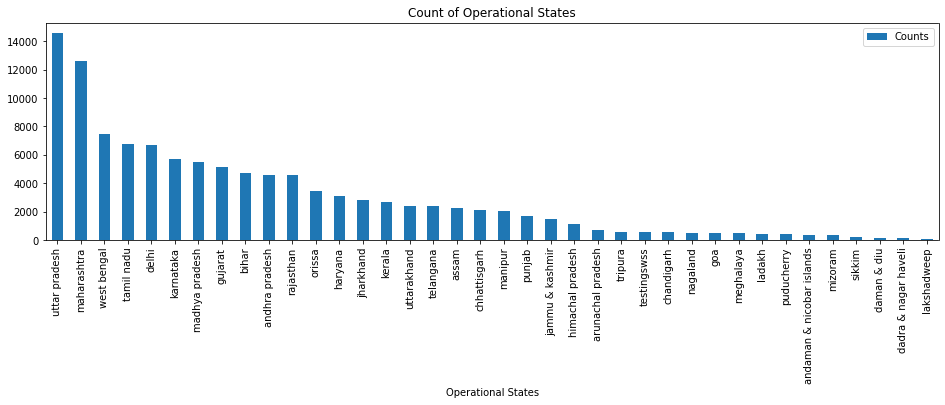

In [139]:
cleaned_column.plot.bar(x="Value", y="Counts", figsize=(16,4))
ax = plt.title("Count of Operational States")
plt.xlabel("Operational States")
plt.show()

### issues working db
<a class="anchor" id="4.9"></a>
List of issues they are working on.  
Some rows contain multiple issues.  
Nulls: 22637  
Unique values: 44  

In [171]:
column = dataset["issues working db"]
column

0         Agriculture,Children,Civic Issues,Disaster Man...
1               Women's Development & Empowerment,Children,
2         Animal Husbandry, Dairying & Fisheries,Agricul...
3         Agriculture,Environment & Forests,Health & Fam...
4         Animal Husbandry, Dairying & Fisheries,Agricul...
                                ...                        
111924    Animal Husbandry, Dairying & Fisheries,Aged/El...
111925    Health & Family Welfare,Agriculture,Animal Hus...
111926    Animal Husbandry, Dairying & Fisheries,Aged/El...
111927                                Education & Literacy,
111928    Animal Husbandry, Dairying & Fisheries,Aged/El...
Name: issues working db, Length: 111929, dtype: object

In [172]:
# Nulls
print("Nulls:", sum(column.isnull()))
column = column.dropna()

# Lowercase all strings
column = column.str.lower()

# Strip leading and tailing whitespace and create set to remove duplicates in list
split_column = [list(set([i.strip() for i in row])) for row in column.str.split(',')]    

# Drop([0]) to remove empty string
cleaned_column = pd.Series(split_column).explode().value_counts().rename_axis('Value').reset_index(name='Counts').drop([0])
cleaned_column

Nulls: 22637


,Value,Counts
1,education & literacy,61582
2,health & family welfare,41081
3,children,38616
4,women's development & empowerment,37280
5,vocational training,30138
6,environment & forests,28545
7,rural development & poverty alleviation,27503
8,art & culture,27326
9,agriculture,25681
10,drinking water,21376


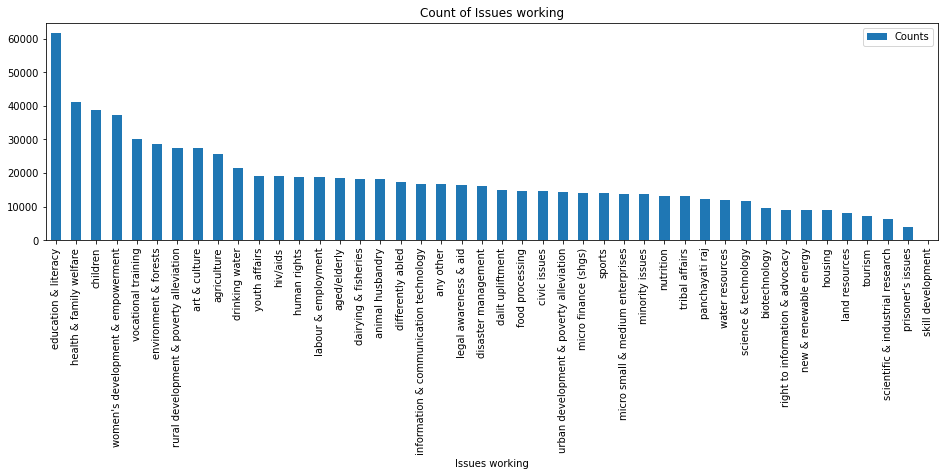

In [173]:
cleaned_column.plot.bar(x="Value", y="Counts", figsize=(16,4))
ax = plt.title("Count of Issues working")
plt.xlabel("Issues working")
plt.show()

### operational district db
<a class="anchor" id="4.9"></a>
List of districts they operate in.  
Some rows contain multiple districts and arrows.  
Nulls: 23039

In [174]:
column = dataset["operational district db"]
column

0                                    ORISSA->Nabarangapur ,
1                                   PUDUCHERRY->Puducherry,
2         MADHYA PRADESH->Anuppur, Ashoknagar, Balaghat,...
3         UTTAR PRADESH->Deoria, Gorakhpur, Sant Kabir N...
4         UTTARAKHAND->Almora , Bageshwar, Champawat, Pi...
                                ...                        
111924                            UTTAR PRADESH->Prayagraj,
111925                         MADHYA PRADESH->Hoshangabad,
111926                            UTTAR PRADESH->Prayagraj,
111927                                     GUJARAT->Valsad,
111928    RAJASTHAN->Ajmer, Alwar, Bharatpur , Bikaner, ...
Name: operational district db, Length: 111929, dtype: object

In [177]:
# Nulls
print("Nulls:", sum(column.isnull()))
column = column.dropna()

# Lowercase all strings
column = column.str.lower()

# Remove arrows
column = column.str.replace('->', ',')

# Strip leading and tailing whitespace and create set to remove duplicates in list
split_column = [list(set([i.strip() for i in row])) for row in column.str.split(',')]    

# Drop([0]) to remove empty string
cleaned_column = pd.Series(split_column).explode().value_counts().rename_axis('Value').reset_index(name='Counts').drop([0])
cleaned_column

Nulls: 0


,Value,Counts
1,uttar pradesh,14571
2,maharashtra,12593
3,west bengal,7452
4,tamil nadu,6741
5,delhi,6698
...,...,...
725,east jaintia hills,51
726,south west khasi hills,49
727,north garo hills,47
728,south west garo hills,41


There are 718 districts in India. However there are 729 unique rows because some districts ahve

In [180]:
cleaned_column["Value"].unique()

array(['uttar pradesh', 'maharashtra', 'west bengal', 'tamil nadu',
       'delhi', 'karnataka', 'madhya pradesh', 'gujarat', 'bihar',
       'andhra pradesh', 'rajasthan', 'lucknow', 'orissa', 'haryana',
       'jharkhand', 'new delhi', 'kerala', 'mumbai', 'bangalore', 'pune',
       'uttarakhand', 'telangana', 'kolkata', 'assam', 'prayagraj',
       'chhattisgarh', 'varanasi', 'south twenty four parganas',
       'manipur', 'aurangabad', 'bhopal', 'ghaziabad', 'jaipur', 'patna',
       'south', 'east', 'kanpur nagar', 'north west',
       'north twenty four parganas', 'thane', 'chennai', 'nagpur',
       'punjab', 'agra', 'gorakhpur', 'moradabad', 'south west', 'meerut',
       'pratapgarh', 'nashik', 'bara banki', 'ahmadabad', 'hyderabad',
       'north east', 'gautam buddha nagar', 'mumbai suburban',
       'jammu & kashmir', 'north', 'aligarh', 'faizabad', 'bareilly',
       'mathura', 'rae bareli', 'west', 'raigarh', 'central',
       'saharanpur', 'indore', 'ghazipur', 'sitapur'